# HW 8

This assignment covers all fundamental concepts required for completing a project

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Support Vector machine example](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
* [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)

# Import all required library 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import json
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Data Processing

**Q1** Get training data from the dataframe
1. Load ```HW8_data.csv``` from ```data``` folder into data frame
2. Print the head of the dataframe
3. Print the shape of the dataframe
4. Print the description of the dataframe
5. Assign ```Cover_Type``` values to Y
6. Assign rest of the column values to X

**A1** Fill the cell blocks below, Create new cell as per your necessary

In [2]:
#You can create or remove cells as per your need

In [3]:
df = pd.read_csv("data/HW8_data.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3080,137,18,166,1,1009,250,198,166,3635,...,0,0,0,0,0,0,0,0,0,1
1,2758,19,8,551,49,1766,225,231,124,1648,...,0,0,0,0,0,0,0,0,0,2
2,2779,86,9,43,-10,3889,155,204,123,364,...,0,0,0,0,0,0,1,0,0,2
3,2811,296,0,287,4,788,191,226,113,144,...,0,0,0,0,0,0,0,0,0,2
4,2956,314,26,71,22,2910,230,200,99,743,...,0,0,0,0,0,0,1,0,0,2


In [4]:
df.shape

(80000, 55)

In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,2981.434325,151.634175,15.093913,271.564212,51.510737,1770.080712,211.781612,221.069125,140.711750,1577.937550,...,0.038150,0.037687,0.011838,0.015425,0.010812,0.012538,0.040325,0.039163,0.030437,1.770725
std,287.972764,109.945631,8.531364,227.532197,68.091489,1318.661060,30.814815,22.191030,43.859689,1126.514346,...,0.191559,0.190441,0.108155,0.123237,0.103420,0.111268,0.196722,0.193983,0.171789,0.892577
min,1813.000000,-29.000000,-3.000000,-43.000000,-276.000000,-238.000000,10.000000,69.000000,-48.000000,-218.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2762.000000,60.000000,9.000000,111.000000,4.000000,821.000000,198.000000,210.000000,115.000000,781.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2967.000000,122.000000,14.000000,212.000000,31.000000,1440.000000,218.000000,224.000000,142.000000,1361.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3217.000000,246.000000,20.000000,361.000000,78.000000,2366.000000,233.000000,237.000000,169.000000,2083.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4271.000000,400.000000,61.000000,1544.000000,562.000000,7604.000000,293.000000,264.000000,268.000000,8011.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
Y = df.Cover_Type
df.drop(columns = ['Cover_Type'], inplace = True)
X = df

**Q2:** Observe the range of all feature values from the dataframe description above. 
1. Do you think in our dataset normalization is required? -- Give proper justification based on your opinion. 
2. What type of normalization/Scaling technique you whould recommend for our dataset?

**A2** 

```Answer 1:``` I believe data normalization is required, this is because the ranges for all the features are different, so we want a normal scale for all the features.

```Answer 2:``` I'm going to try Standard Scalar, because it will put the range between [-1, 1] and the mean will be 0 

**Q3:** 
1. Use the above mentioned normalization technique on our HW_8 dataset.
2. Transform the X dataframe using choosen normalization technique. 

### ```Note:``` Make sure the scaled X has all column name same as ```X dataframe```

**A3** Fill the cell blocks below, Create new cell as per your necessary

In [7]:
#You can create or remove cells as per your need
Scaled_X = X.copy()
cols_to_scale = list(df.columns[:14])
features = Scaled_X[cols_to_scale]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
Scaled_X[cols_to_scale] = features
#xMM = X.copy()
#for column in xMM.columns:
#    xMM[column] = (xMM[column] - xMM[column].min()) / xMM[column].max() - xMM[column].min()
#Scaled_X = xMM

In [8]:
Scaled_X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,-6.135745e-16,5.525441e-17,-1.338672e-16,5.059148e-17,1.021294e-16,6.123435e-17,1.695366e-16,-6.589533e-16,7.421563e-17,-1.148012e-16,...,0.027125,0.038150,0.037687,0.011838,0.015425,0.010812,0.012538,0.040325,0.039163,0.030437
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,0.162449,0.191559,0.190441,0.108155,0.123237,0.103420,0.111268,0.196722,0.193983,0.171789
min,-4.057473e+00,-1.642951e+00,-2.120883e+00,-1.382513e+00,-4.809893e+00,-1.522827e+00,-6.548242e+00,-6.852772e+00,-4.302651e+00,-1.594253e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.620016e-01,-8.334551e-01,-7.142997e-01,-7.056813e-01,-6.977529e-01,-7.197351e-01,-4.472426e-01,-4.988139e-01,-5.862310e-01,-7.074411e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.012424e-02,-2.695365e-01,-1.282233e-01,-2.617853e-01,-3.012251e-01,-2.503166e-01,2.017999e-01,1.320756e-01,2.937226e-02,-1.925754e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.180188e-01,8.583007e-01,5.750684e-01,3.930712e-01,3.890270e-01,4.519152e-01,6.885818e-01,7.179015e-01,6.449755e-01,4.483437e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.478110e+00,2.259002e+00,5.380895e+00,5.592368e+00,7.497155e+00,4.424151e+00,2.635709e+00,1.934617e+00,2.902188e+00,5.710626e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Q4:** 

1. Check and show if there is any null values in our dataset.
2. Print all unique values/ different class id from the ```Y data```.


**A4** Fill the cell blocks below, Create new cell as per your necessary

In [9]:
#You can create or remove cells as per your need
print(Scaled_X.isna().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [10]:
#Filling in null values in X with 0
Scaled_X.fillna(0, inplace = True)
Scaled_X.isna().sum().sum()

0

In [11]:
Y = Y.astype(int)
pd.value_counts(Y)

2    45393
1    29311
3     3816
7     1245
6      229
4        6
Name: Cover_Type, dtype: int64

## Part 1: Use a subset of whole data(N=20000) for Data Visualization



**Data Subset Creation**

1. First we are Selecting ```N=20000``` random rows from our original dataset which is ```df``` and create a new subset of data.

2. Using the below **rndperm** and selecting first N index from the ```Scaled_X``` and ```Y```

In [12]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 20000
data_subset_x = Scaled_X.loc[rndperm[:N],:].copy()
data_subset_y = Y.loc[rndperm[:N]].copy()

**Q5:**

1. Use PCA and reduce the dimension of the **data_subset_x** into ```3```.
2. Store the PCA reuslt into ```pca_result``` variable
3. Add the resutls from the PCA into the **data_subset_x** as new columns. (Choose any meaningful names for the columns) 


**A5** Fill the below cells. Use extra cells as per your necessary

In [13]:
#You can create or remove cells as per your need
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(data_subset_x)

In [14]:
data_subset_x.insert(54, 'pca-one', pca_result[:, 0]) 
data_subset_x.insert(55, 'pca-two', pca_result[:, 1])
data_subset_x.insert(56, 'pca-three', pca_result[:, 2])

##### **Q6:**

1. Use TSNE and reduce the dimension of the **data_subset_x** into ```2```.
2. Store the TSNE reuslt into ```tsne_results``` variable
3. Add the resutls from the T-SNE into the **data_subset_x** as new columns. (Choose any meaningful names for the columns) 


```Note:``` 
1. You can use ```from sklearn.manifold import TSNE``` for TSNE initialization.
2. Give value of n_components as per the question.
3. Also use other parameters while TSNE initialization as, ```verbose=1, perplexity=40, n_iter=300```

**A6** Fill the below cells. Use extra cells as per your necessary

In [15]:
from sklearn.manifold import TSNE

In [16]:
#You can create or remove cells as per your need
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(data_subset_x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.006s...


/Users/jeffboerger/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jeffboerger/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 20000 samples in 0.688s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sample 13000 / 20000
[t-SNE] Computed conditional probabilities for sample 14000 / 20000

In [17]:
data_subset_x.insert(57, 'tsne-one', tsne_results[:, 0])
data_subset_x.insert(58, 'tsne-two', tsne_results[:, 1])

**Q7:**

1. Create a new dataframe with name ```df_plot```
2. This dataframe will merge everything from **data_subset_x** and **data_subset_y**
3. We need to give a name for the ```data_subset_y``` column. Use ```Cover_Type``` as the name of the column


**A7** Fill the below cells. Use extra cells as per your necessary

In [18]:
df_plot = data_subset_x
df_plot['Cover_Type'] = data_subset_y

In [19]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 47044 to 57253
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           20000 non-null  float64
 1   Aspect                              20000 non-null  float64
 2   Slope                               20000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    20000 non-null  float64
 4   Vertical_Distance_To_Hydrology      20000 non-null  float64
 5   Horizontal_Distance_To_Roadways     20000 non-null  float64
 6   Hillshade_9am                       20000 non-null  float64
 7   Hillshade_Noon                      20000 non-null  float64
 8   Hillshade_3pm                       20000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  20000 non-null  float64
 10  Wilderness_Area1                    20000 non-null  float64
 11  Wilderness_Area2                    2

**Q8:** Now we will plot all points from our dataframe ```df_plot``` Using the result from **PCA**

1. Use ```pca-one``` and ```pca-two``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.

```Note:``` Use the notebook from class for reference. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2022Fall/blob/main/project/Data_Viz_with_PCA_TSNE.ipynb

**A8** Fill the below cells. Use extra cells as per your necessary

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

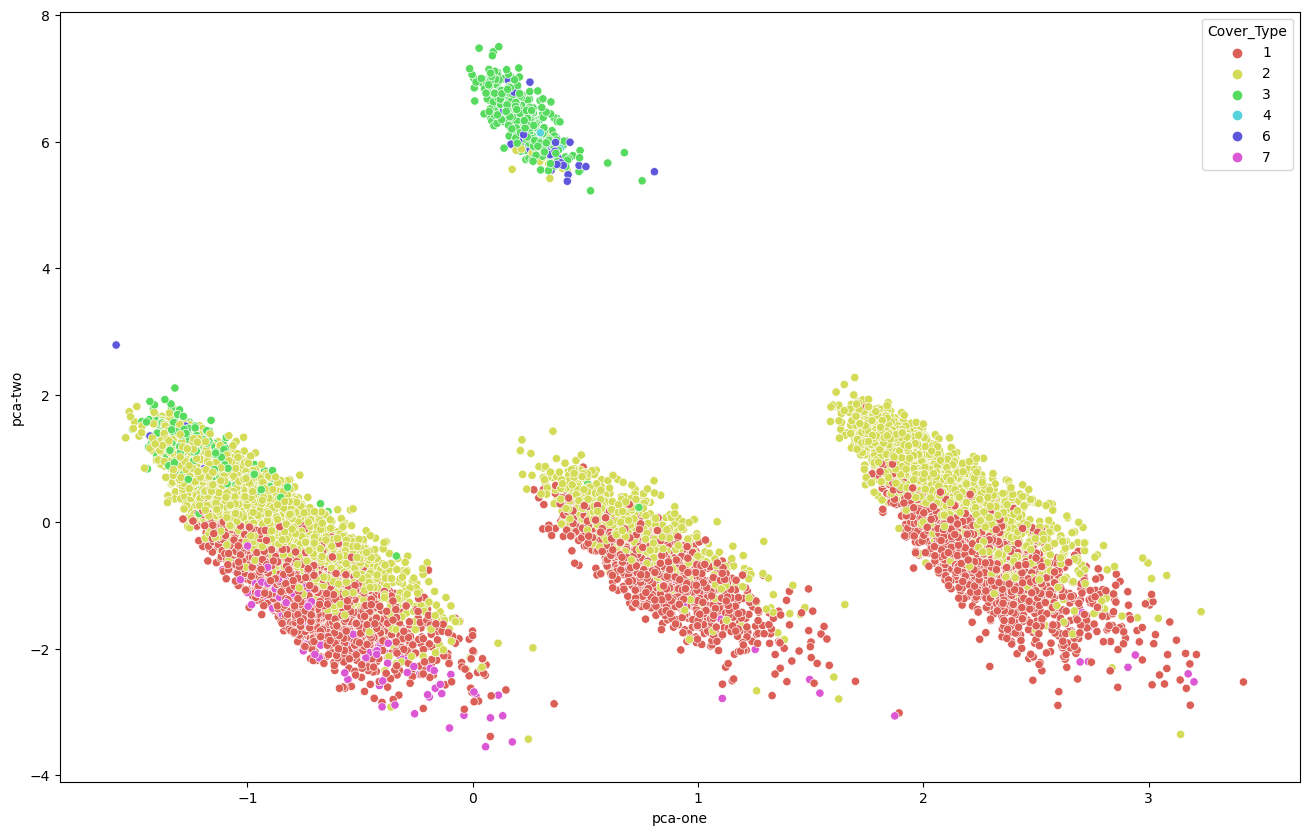

In [20]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "pca-one", y = "pca-two",
    hue = "Cover_Type",
    palette = sns.color_palette("hls", 6),
    data = df_plot,
    legend = 'full'
)

**Q9:** Now we will plot all points from our dataframe ```df_plot``` Using result from T-SNE.

1. Use ```tsne-2d-one``` and ```tsne-2d-one``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.


```Note:``` Use the notebook from class for reference. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2022Fall/blob/main/project/Data_Viz_with_PCA_TSNE.ipynb

**A9** Fill the below cells. Use extra cells as per your necessary

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

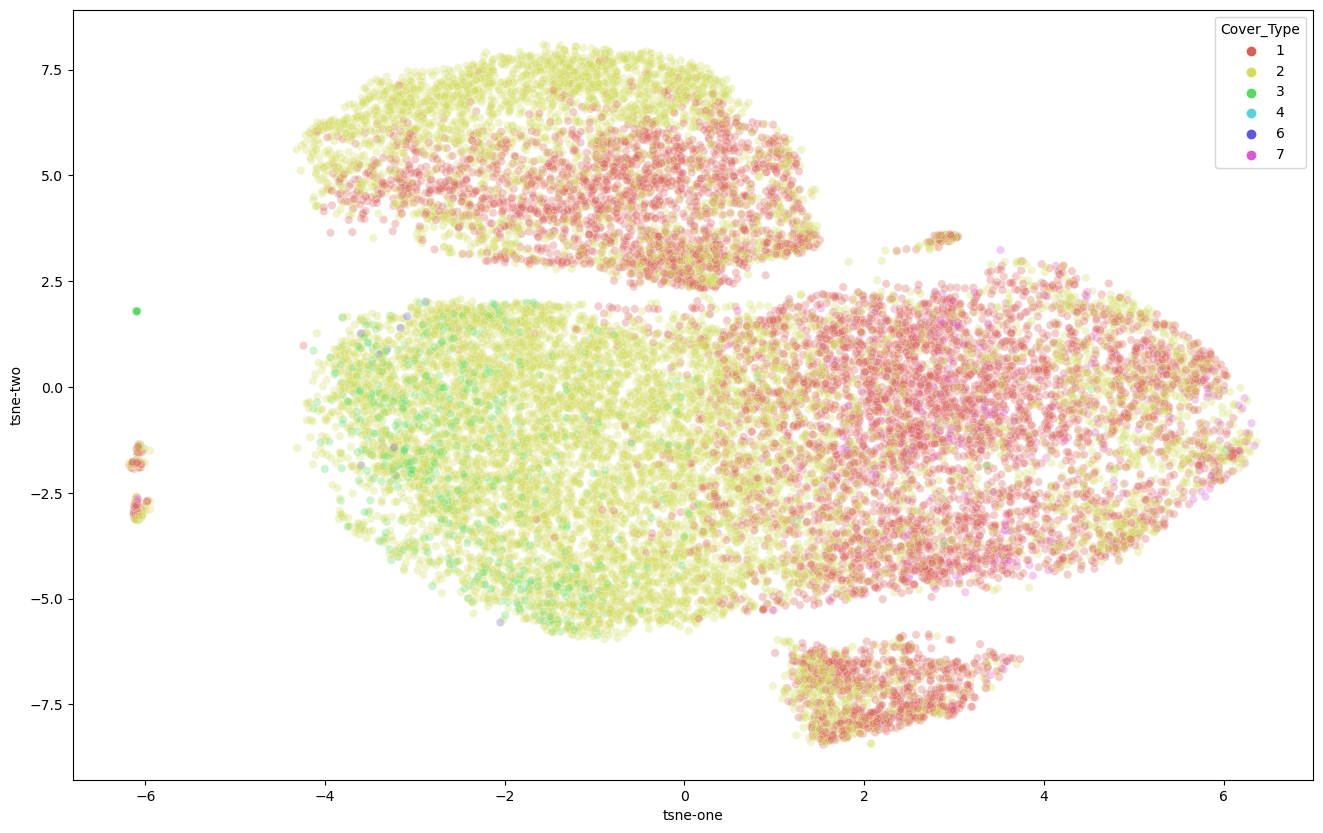

In [21]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "tsne-one", y = 'tsne-two',
    hue = 'Cover_Type',
    palette = sns.color_palette("hls", 6),
    data = df_plot,
    legend = 'full',
    alpha = .3

)

## Part 2: Data Analysis and Classification Using Entire Dataset

**Q10:** Observe the data plotting and find the realtion between datapoints and their characteristics.


1. Reduce the dimension of our ```Scaled_X``` dataframe to ```3``` using PCA algorithm.
2. Store the result into a variable named ```pca_result```
3. Create Train data and Test data using the pca_result and Y.

```Note:``` 
1. Consider pca_result as X values, and Y as y values.
2. You can use sklearn train_test_split
3. Keep Train and Test ratio as : 75%:25%

**A10** Fill the below cells. Use extra cells as per your necessary

In [22]:
#You can create or remove cells as per your need
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(Scaled_X)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(pca_result, Y, test_size = .25, random_state = 58)

### Now, Select Three best model for our dataset. You have to decide three models which might work well with our dataset. 

**Q11** 

**Model Number 1** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A11** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```
I am choosing SVM as the first model, according to the professor, it is lightweight and is used frequently in industry, so it seems like a logical choice right off the bat.



In [24]:
#You can create or remove cells as per your need
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svm_score = svc.score(x_test, y_test)
print(svm_score)

0.80745


**Q12** 

**Model Number 2** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A12** Fill the below cells. Use extra cells as per your necessaryReplace ??? with code in the code cell below

```Answer for Q.No:1 goes here```

Next I am choosing Linear Regression, while it is the simplest model we have covered, it could still gives a good idea of what is going on with the data.


In [25]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
reg_y_pred = reg.predict(x_test)
score = reg.score(x_test, y_test)

print('Linear Regression score with default params: ', score)

Linear Regression score with default params:  0.1425684223526149


**Q13** 

**Model Number 3** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A13** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```

Next I am going to try kNN. It can be used for both Classificaiton and Regression, so we might get some interesting results.


In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 50)
knn.fit(x_train, y_train)
knn_score = knn.score(x_test, y_test)
print(knn_score)

0.19283644680134981


**Q14** 


1. Plot a histogram using Y dataframe and display the per-class data distribution(number of rows per class).
2. Also print the number of rows per class as numeric value.

**A14** Fill the below cells. Use extra cells as per your necessary

2    45393
1    29311
3     3816
7     1245
6      229
4        6
Name: Cover_Type, dtype: int64

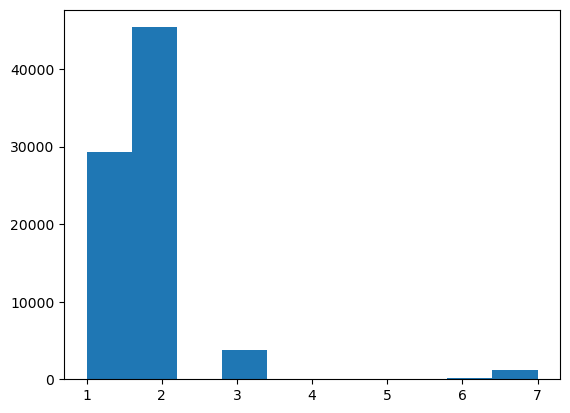

In [27]:
#You can create or remove cells as per your need
plt.hist(Y)
plt.show
pd.value_counts(Y)

**Q15** 


1. From the histogram we can see that the dataset is highly imbalanced.
2. Use a proper dataset balancing technique to make the dataset balanced.
3. Plot a histogram using new y values and display the per-class data distribution(number of rows per class).

```Note:``` Use can use the ```imblearn.over_sampling``` library for this task. But use appropriate strategy for the method.

Follow the documentation for details: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

**A15** Fill the below cells. Use extra cells as per your necessary

In [28]:
from imblearn.over_sampling import SMOTE
#You can create or remove cells as per your need

sm = SMOTE(random_state = 58)
X_res, y_res= sm.fit_resample(Scaled_X, Y)

(array([45393., 45393.,     0., 45393.,     0., 45393.,     0.,     0.,
        45393., 45393.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

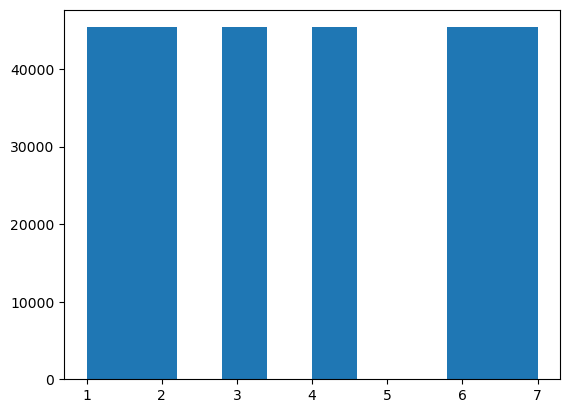

In [29]:
plt.hist(y_res)

**Q16** 


1. Create new Train and Test data from the balaned X and Y value.
2. Keep Train and Test ratio as : 75%:25%

**A16** Fill the below cells. Use extra cells as per your necessary

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X_res, y_res, test_size = .25, random_state = 58)

**Q17**

### Now, Use the previously initialized three models and calculate the score from our new balanced dataset.



**Model Number 1** 

1. Fit the model with the new train data(Use the previous Model 1) 
2. Get the score from the model using  new test data

**A17** Fill the below cells. Use extra cells as per your necessary

In [31]:
#You can create or remove cells as per your need
svc = SVC()
svc.fit(x_train, y_train)
svm_score = svc.score(x_test, y_test)
print(svm_score)

0.933176677926274


**Model Number 2** 

1. Fit the model with the new train data(Use the previous Model 2) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [34]:
#You can create or remove cells as per your need
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
reg_y_pred = reg.predict(x_test)
score = reg.score(x_test, y_test)
print(score)

0.36153895548659987


**Model Number 3** 

1. Fit the model with the new train data(Use the previous Model 3) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [33]:
#You can create or remove cells as per your need
knn = KNeighborsRegressor(n_neighbors = 50)
knn.fit(x_train, y_train)
knn_score = knn.score(x_test, y_test)
print(knn_score)

0.7500579030493395


### After making the dataset balanced we can see a significant improve in the performence for all three models.